In [ ]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from google.colab import drive
from scipy import stats



drive.mount("/content/drive")

np.set_printoptions(threshold = np.inf)
pd.set_option("display.max_columns", None)

Mounted at /content/drive


In [ ]:
sheet_id = "1NQrwg4WienbGk7fbvnETSjusyLsJUiUoMx3Ey_Y0R6k"
gid = "233962877"

data = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}")
data = data.rename(columns = lambda x : x.lower())
data

,time,latitude,longitude,depth,mag,magtype,nst,gap,dmin,rms,net,id,updated,place,type,horizontalerror,deptherror,magerror,magnst,status,locationsource,magsource
0,1905-05-11 17:09:01,25.9670,143.3320,15.000,6.78,mw,22.0,134.0,2.044,0.37,iscgemsup,iscgemsup610548602,2022-05-09T15:22:55.604Z,"Volcano Islands, Japan region",earthquake,4.6,8.1,0.231,67.0,reviewed,us,us
1,1905-06-02 5:39:40,33.7150,131.7590,60.000,6.91,mw,32.0,29.0,1.788,1.12,iscgem,iscgem16957852,2022-04-25T20:23:58.797Z,"31 km SSW of Hikari, Japan",earthquake,11.8,2.0,0.128,80.0,reviewed,us,us
2,1905-07-06 16:20:47,38.4170,144.1190,15.000,7.67,mw,34.0,38.0,0.905,1.36,iscgem,iscgem914292,2022-04-26T00:10:30.983Z,"217 km ESE of Kamaishi, Japan",earthquake,8.0,2.0,0.105,32.0,reviewed,us,us
3,1906-01-21 13:49:34,34.1750,138.0250,300.000,7.40,mw,89.0,169.0,2.881,0.65,iscgem,iscgem16957883,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,4.7,38.2,0.115,26.0,reviewed,us,us
4,1906-02-24 0:13:41,34.6330,141.4240,15.000,6.25,mw,46.0,15.0,1.153,0.86,iscgem,iscgem610326306,2022-04-25T20:36:44.935Z,"116 km ESE of Katsuura, Japan",earthquake,3.5,2.0,0.115,22.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22118,2023-10-08 21:21:42,29.7824,139.9375,10.000,4.90,mb,32.0,131.0,6.900,0.52,us,us6000le3x,2023-10-08T22:06:57.040Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22119,2023-10-09 2:51:35,40.2517,142.3930,50.461,5.00,mb,18.0,179.0,1.146,0.27,us,us6000le5d,2023-10-11T01:44:41.040Z,"51 km ENE of Noda, Japan",earthquake,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22120,2023-10-13 9:59:52,41.0801,140.1595,172.478,5.00,mww,90.0,28.0,0.745,0.97,us,us6000lfbl,2023-10-13T10:32:53.136Z,"Hokkaido, Japan region",earthquake,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22121,2023-10-14 2:29:25,41.4868,142.1157,61.485,4.90,mb,65.0,127.0,0.941,0.74,us,us6000lfgw,2023-10-14T03:02:39.741Z,"78 km ENE of Mutsu, Japan",earthquake,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.describe() # Total statistical description of the data's numerical columns

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalerror,deptherror,magerror,magnst
count,22123.000000,22123.000000,22123.000000,22123.000000,13099.000000,17365.000000,10196.000000,21978.000000,3535.000000,3509.000000,3508.000000,5396.000000
mean,35.550333,140.915084,58.762230,4.921088,83.112909,108.820363,2.936481,0.848421,7.118382,5.133960,0.119928,38.847294
std,4.922796,3.981671,90.882413,0.492188,103.526458,42.401635,2.835091,0.236404,2.649698,3.371872,0.065211,63.123182
min,24.862900,128.936000,0.000000,4.500000,4.000000,8.000000,0.038000,0.040000,0.000000,0.000000,0.010000,1.000000
25%,31.386000,140.127550,21.300000,4.600000,21.000000,79.000000,1.219000,0.700000,5.800000,1.900000,0.072000,12.000000
50%,36.318000,141.795400,33.740000,4.800000,44.000000,115.000000,2.181500,0.840000,7.140000,5.200000,0.108000,19.000000
75%,39.270400,143.068500,52.500000,5.100000,100.000000,133.600000,3.408750,1.000000,8.600000,7.438000,0.153000,35.000000
max,43.580000,152.222000,683.360000,9.100000,929.000000,303.000000,43.302000,1.880000,20.500000,38.200000,0.558000,706.000000


In [ ]:
data.info() # some more summary of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22123 entries, 0 to 22122
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             22123 non-null  object 
 1   latitude         22123 non-null  float64
 2   longitude        22123 non-null  float64
 3   depth            22123 non-null  float64
 4   mag              22123 non-null  float64
 5   magtype          22123 non-null  object 
 6   nst              13099 non-null  float64
 7   gap              17365 non-null  float64
 8   dmin             10196 non-null  float64
 9   rms              21978 non-null  float64
 10  net              22123 non-null  object 
 11  id               22123 non-null  object 
 12  updated          22123 non-null  object 
 13  place            22024 non-null  object 
 14  type             22123 non-null  object 
 15  horizontalerror  3535 non-null   float64
 16  deptherror       3509 non-null   float64
 17  magerror    

In [ ]:
data.index = pd.to_datetime(data.index) # data's index is not in datetime format, so converted it into datetime format and printed it.
data.index

DatetimeIndex([          '1970-01-01 00:00:00',
               '1970-01-01 00:00:00.000000001',
               '1970-01-01 00:00:00.000000002',
               '1970-01-01 00:00:00.000000003',
               '1970-01-01 00:00:00.000000004',
               '1970-01-01 00:00:00.000000005',
               '1970-01-01 00:00:00.000000006',
               '1970-01-01 00:00:00.000000007',
               '1970-01-01 00:00:00.000000008',
               '1970-01-01 00:00:00.000000009',
               ...
               '1970-01-01 00:00:00.000022113',
               '1970-01-01 00:00:00.000022114',
               '1970-01-01 00:00:00.000022115',
               '1970-01-01 00:00:00.000022116',
               '1970-01-01 00:00:00.000022117',
               '1970-01-01 00:00:00.000022118',
               '1970-01-01 00:00:00.000022119',
               '1970-01-01 00:00:00.000022120',
               '1970-01-01 00:00:00.000022121',
               '1970-01-01 00:00:00.000022122'],
              dtype=

In [ ]:
100 * ((data.isnull().sum()) / (data.shape[0])) # percentage of null values of each column

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magtype             0.000000
nst                40.790128
gap                21.507029
dmin               53.912218
rms                 0.655426
net                 0.000000
id                  0.000000
updated             0.000000
place               0.447498
type                0.000000
horizontalerror    84.021154
deptherror         84.138679
magerror           84.143199
magnst             75.609095
status             75.604574
locationsource     75.604574
magsource          75.604574
dtype: float64

In [ ]:
data.shape # (num_rows, num_columns)

(22123, 22)

In [ ]:
# number of unique values in each colums
data.nunique()

time               22122
latitude           14783
longitude          12504
depth               4670
mag                  219
magtype                8
nst                  576
gap                 1609
dmin                4777
rms                  163
net                    4
id                 22123
updated            21087
place              11043
type                   2
horizontalerror      485
deptherror           586
magerror             276
magnst               320
status                 1
locationsource         1
magsource              2
dtype: int64

In [ ]:
# numerical columns
data.select_dtypes(include = np.number).columns

Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalerror', 'deptherror', 'magerror', 'magnst'],
      dtype='object')

In [ ]:
# non numerical columns
data.select_dtypes(include = ["object"]).columns

Index(['time', 'magtype', 'net', 'id', 'updated', 'place', 'type', 'status',
       'locationsource', 'magsource'],
      dtype='object')

In [ ]:
# categorical columns and number of cateories:
num_unq = pd.DataFrame(data.nunique())
num_unq[num_unq[0] < 9]

,0
magtype,8
net,4
type,2
status,1
locationsource,1
magsource,2


In [ ]:
for column in sorted(data.columns):
    print(column)

depth
deptherror
dmin
gap
horizontalerror
id
latitude
locationsource
longitude
mag
magerror
magnst
magsource
magtype
net
nst
place
rms
status
time
type
updated


In [ ]:
num_cols = data.select_dtypes(include = np.number).columns
num_cols

Index(['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
       'horizontalerror', 'deptherror', 'magerror', 'magnst'],
      dtype='object')

In [ ]:
non_num_cols = data.select_dtypes(include = ["object"]).columns
non_num_cols

Index(['time', 'magtype', 'net', 'id', 'updated', 'place', 'type', 'status',
       'locationsource', 'magsource'],
      dtype='object')

In [ ]:
100 * (data.isnull().sum() / data.shape[0])

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magtype             0.000000
nst                40.790128
gap                21.507029
dmin               53.912218
rms                 0.655426
net                 0.000000
id                  0.000000
updated             0.000000
place               0.447498
type                0.000000
horizontalerror    84.021154
deptherror         84.138679
magerror           84.143199
magnst             75.609095
status             75.604574
locationsource     75.604574
magsource          75.604574
dtype: float64

In [ ]:
dup = data.copy()
100 * (dup.isnull().sum() / dup.shape[0])

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magtype             0.000000
nst                40.790128
gap                21.507029
dmin               53.912218
rms                 0.655426
net                 0.000000
id                  0.000000
updated             0.000000
place               0.447498
type                0.000000
horizontalerror    84.021154
deptherror         84.138679
magerror           84.143199
magnst             75.609095
status             75.604574
locationsource     75.604574
magsource          75.604574
dtype: float64

In [ ]:
for column in dup.select_dtypes(include=['object']).columns:
    non_null_values = dup[column].dropna().unique()
    random_values = np.random.choice(non_null_values, size=dup[column].isna().sum())
    dup.loc[dup[column].isna(), column] = random_values
100 * (dup.isnull().sum() / dup.shape[0])

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magtype             0.000000
nst                40.790128
gap                21.507029
dmin               53.912218
rms                 0.655426
net                 0.000000
id                  0.000000
updated             0.000000
place               0.000000
type                0.000000
horizontalerror    84.021154
deptherror         84.138679
magerror           84.143199
magnst             75.609095
status              0.000000
locationsource      0.000000
magsource           0.000000
dtype: float64

In [ ]:
dup = dup.interpolate(method = "linear", limit_direction = "both", limit_area = "inside")
100 * (dup.isnull().sum() / dup.shape[0])

time                0.000000
latitude            0.000000
longitude           0.000000
depth               0.000000
mag                 0.000000
magtype             0.000000
nst                 0.000000
gap                 0.000000
dmin                0.000000
rms                 0.000000
net                 0.000000
id                  0.000000
updated             0.000000
place               0.000000
type                0.000000
horizontalerror    84.021154
deptherror         84.021154
magerror           84.021154
magnst             75.604574
status              0.000000
locationsource      0.000000
magsource           0.000000
dtype: float64

In [ ]:
req = ["horizontalerror", "deptherror", "magerror", "magnst"]
dup[req].dtypes

horizontalerror    float64
deptherror         float64
magerror           float64
magnst             float64
dtype: object

In [ ]:
for column in dup.select_dtypes(include=['float64']).columns:
    non_null_values = dup[column].dropna().unique()
    random_values = np.random.choice(non_null_values, size=dup[column].isna().sum())
    dup.loc[dup[column].isna(), column] = random_values
100 * (dup.isnull().sum() / dup.shape[0])

time               0.0
latitude           0.0
longitude          0.0
depth              0.0
mag                0.0
magtype            0.0
nst                0.0
gap                0.0
dmin               0.0
rms                0.0
net                0.0
id                 0.0
updated            0.0
place              0.0
type               0.0
horizontalerror    0.0
deptherror         0.0
magerror           0.0
magnst             0.0
status             0.0
locationsource     0.0
magsource          0.0
dtype: float64

In [ ]:
dup.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalerror,deptherror,magerror,magnst
count,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000,22123.000000
mean,35.550333,140.915084,58.762230,4.921088,76.824617,106.778920,2.563600,0.847942,6.443357,6.003373,0.151051,155.434525
std,4.922796,3.981671,90.882413,0.492188,86.643993,37.942867,1.957825,0.235881,3.554477,4.395367,0.098761,143.230679
min,24.862900,128.936000,0.000000,4.500000,4.000000,8.000000,0.038000,0.040000,0.000000,0.000000,0.010000,1.000000
25%,31.386000,140.127550,21.300000,4.600000,20.714165,88.000000,2.086011,0.700000,4.170000,1.947000,0.068000,32.000000
50%,36.318000,141.795400,33.740000,4.800000,41.000000,106.700000,2.236286,0.840000,6.590000,5.857000,0.133000,116.000000
75%,39.270400,143.068500,52.500000,5.100000,114.000000,127.800000,2.385836,1.000000,8.300000,8.400000,0.208000,244.000000
max,43.580000,152.222000,683.360000,9.100000,929.000000,303.000000,43.302000,1.880000,20.500000,38.200000,0.558000,706.000000


In [ ]:
dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22123 entries, 0 to 22122
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             22123 non-null  object 
 1   latitude         22123 non-null  float64
 2   longitude        22123 non-null  float64
 3   depth            22123 non-null  float64
 4   mag              22123 non-null  float64
 5   magtype          22123 non-null  object 
 6   nst              22123 non-null  float64
 7   gap              22123 non-null  float64
 8   dmin             22123 non-null  float64
 9   rms              22123 non-null  float64
 10  net              22123 non-null  object 
 11  id               22123 non-null  object 
 12  updated          22123 non-null  object 
 13  place            22123 non-null  object 
 14  type             22123 non-null  object 
 15  horizontalerror  22123 non-null  float64
 16  deptherror       22123 non-null  float64
 17  magerror    

In [ ]:
num_cols = dup.select_dtypes(include = ["float64"]).columns
len(num_cols)

12

In [ ]:
dup.index = dup["time"]

In [ ]:
dup.index = pd.to_datetime(dup.index)

In [ ]:
dup.index

DatetimeIndex(['1905-05-11 17:09:01', '1905-06-02 05:39:40',
               '1905-07-06 16:20:47', '1906-01-21 13:49:34',
               '1906-02-24 00:13:41', '1906-03-13 13:26:41',
               '1906-04-08 17:37:52', '1906-04-20 19:39:41',
               '1906-05-04 23:09:07', '1906-09-07 18:52:28',
               ...
               '2023-10-08 20:56:48', '2023-10-08 21:00:42',
               '2023-10-08 21:05:34', '2023-10-08 21:13:29',
               '2023-10-08 21:17:30', '2023-10-08 21:21:42',
               '2023-10-09 02:51:35', '2023-10-13 09:59:52',
               '2023-10-14 02:29:25', '2023-10-14 04:33:14'],
              dtype='datetime64[ns]', name='time', length=22123, freq=None)

In [ ]:
sheet_id = "1wQHTZr_oxaapMfA1HtnnJIoqs2IE-zjod_MtzgC3lR8"
gid = "1871327468"
draft = pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv&gid={gid}")
draft.head(5)

,time,latitude,longitude,depth,mag,magtype,nst,gap,dmin,rms,net,id,updated,place,type,horizontalerror,deptherror,magerror,magnst,status,locationsource,magsource
0,1905-05-11 17:09:01,25.967,143.332,15.0,6.78,mw,22.0,134.0,2.044,0.37,iscgemsup,iscgemsup610548602,2022-05-09T15:22:55.604Z,"Volcano Islands, Japan region",earthquake,4.6,8.1,0.231,67,reviewed,us,us
1,1905-06-02 5:39:40,33.715,131.759,60.0,6.91,mw,32.0,29.0,1.788,1.12,iscgem,iscgem16957852,2022-04-25T20:23:58.797Z,"31 km SSW of Hikari, Japan",earthquake,11.8,2.0,0.128,80,reviewed,us,us
2,1905-07-06 16:20:47,38.417,144.119,15.0,7.67,mw,34.0,38.0,0.905,1.36,iscgem,iscgem914292,2022-04-26T00:10:30.983Z,"217 km ESE of Kamaishi, Japan",earthquake,8.0,2.0,0.105,32,reviewed,us,us
3,1906-01-21 13:49:34,34.175,138.025,300.0,7.40,mw,89.0,169.0,2.881,0.65,iscgem,iscgem16957883,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,4.7,38.2,0.115,26,reviewed,us,us
4,1906-02-24 0:13:41,34.633,141.424,15.0,6.25,mw,46.0,15.0,1.153,0.86,iscgem,iscgem610326306,2022-04-25T20:36:44.935Z,"116 km ESE of Katsuura, Japan",earthquake,3.5,2.0,0.115,22,reviewed,us,us


In [ ]:
draft.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magtype             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalerror    float64
deptherror         float64
magerror           float64
magnst               int64
status              object
locationsource      object
magsource           object
dtype: object

In [ ]:
num_cols = draft.select_dtypes(include = np.number).columns
draft[num_cols] = draft[num_cols].round(3)
draft.head(5)

,time,latitude,longitude,depth,mag,magtype,nst,gap,dmin,rms,net,id,updated,place,type,horizontalerror,deptherror,magerror,magnst,status,locationsource,magsource
0,1905-05-11 17:09:01,25.967,143.332,15.0,6.78,mw,22.0,134.0,2.044,0.37,iscgemsup,iscgemsup610548602,2022-05-09T15:22:55.604Z,"Volcano Islands, Japan region",earthquake,4.6,8.1,0.231,67,reviewed,us,us
1,1905-06-02 5:39:40,33.715,131.759,60.0,6.91,mw,32.0,29.0,1.788,1.12,iscgem,iscgem16957852,2022-04-25T20:23:58.797Z,"31 km SSW of Hikari, Japan",earthquake,11.8,2.0,0.128,80,reviewed,us,us
2,1905-07-06 16:20:47,38.417,144.119,15.0,7.67,mw,34.0,38.0,0.905,1.36,iscgem,iscgem914292,2022-04-26T00:10:30.983Z,"217 km ESE of Kamaishi, Japan",earthquake,8.0,2.0,0.105,32,reviewed,us,us
3,1906-01-21 13:49:34,34.175,138.025,300.0,7.40,mw,89.0,169.0,2.881,0.65,iscgem,iscgem16957883,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,4.7,38.2,0.115,26,reviewed,us,us
4,1906-02-24 0:13:41,34.633,141.424,15.0,6.25,mw,46.0,15.0,1.153,0.86,iscgem,iscgem610326306,2022-04-25T20:36:44.935Z,"116 km ESE of Katsuura, Japan",earthquake,3.5,2.0,0.115,22,reviewed,us,us


In [ ]:
draft

,time,latitude,longitude,depth,mag,magtype,nst,gap,dmin,rms,net,id,updated,place,type,horizontalerror,deptherror,magerror,magnst,status,locationsource,magsource
0,1905-05-11 17:09:01,25.967,143.332,15.000,6.78,mw,22.0,134.0,2.044,0.37,iscgemsup,iscgemsup610548602,2022-05-09T15:22:55.604Z,"Volcano Islands, Japan region",earthquake,4.60,8.100,0.231,67,reviewed,us,us
1,1905-06-02 5:39:40,33.715,131.759,60.000,6.91,mw,32.0,29.0,1.788,1.12,iscgem,iscgem16957852,2022-04-25T20:23:58.797Z,"31 km SSW of Hikari, Japan",earthquake,11.80,2.000,0.128,80,reviewed,us,us
2,1905-07-06 16:20:47,38.417,144.119,15.000,7.67,mw,34.0,38.0,0.905,1.36,iscgem,iscgem914292,2022-04-26T00:10:30.983Z,"217 km ESE of Kamaishi, Japan",earthquake,8.00,2.000,0.105,32,reviewed,us,us
3,1906-01-21 13:49:34,34.175,138.025,300.000,7.40,mw,89.0,169.0,2.881,0.65,iscgem,iscgem16957883,2022-04-25T20:24:35.887Z,"50 km SSW of ?yama, Japan",earthquake,4.70,38.200,0.115,26,reviewed,us,us
4,1906-02-24 0:13:41,34.633,141.424,15.000,6.25,mw,46.0,15.0,1.153,0.86,iscgem,iscgem610326306,2022-04-25T20:36:44.935Z,"116 km ESE of Katsuura, Japan",earthquake,3.50,2.000,0.115,22,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22118,2023-10-08 21:21:42,29.782,139.938,10.000,4.90,mb,32.0,131.0,6.900,0.52,us,us6000le3x,2023-10-08T22:06:57.040Z,"Izu Islands, Japan region",earthquake,7.06,9.600,0.121,101,reviewed,us,us
22119,2023-10-09 2:51:35,40.252,142.393,50.461,5.00,mb,18.0,179.0,1.146,0.27,us,us6000le5d,2023-10-11T01:44:41.040Z,"51 km ENE of Noda, Japan",earthquake,0.66,0.400,0.029,164,reviewed,us,us
22120,2023-10-13 9:59:52,41.080,140.160,172.478,5.00,mww,90.0,28.0,0.745,0.97,us,us6000lfbl,2023-10-13T10:32:53.136Z,"Hokkaido, Japan region",earthquake,0.55,11.700,0.233,171,reviewed,us,gcmt
22121,2023-10-14 2:29:25,41.487,142.116,61.485,4.90,mb,65.0,127.0,0.941,0.74,us,us6000lfgw,2023-10-14T03:02:39.741Z,"78 km ENE of Mutsu, Japan",earthquake,2.59,0.660,0.116,153,reviewed,us,us


<Axes: ylabel='Frequency'>

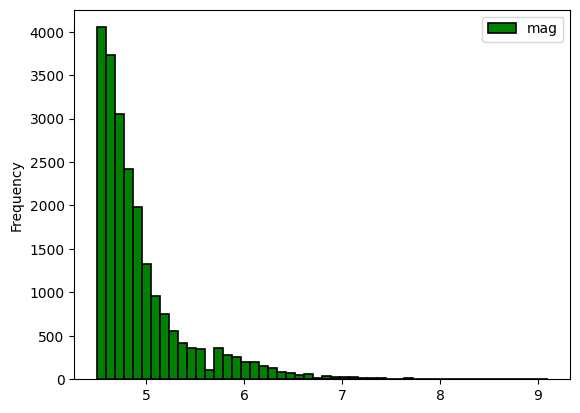

In [ ]:
draft.plot.hist(y = "mag", bins = 50, color = "green", edgecolor = "black", linewidth = 1.2)

In [ ]:
x = None
type(x)

NoneType